In [1]:
import pandas as pd
import numpy as np

# **1. Dataset Selection and Exploration**

In [2]:
# Read data transactions
transaction = pd.read_csv('transactions.csv')
transaction.head()

,Transaction ID,Timestamp,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status
0,4d3db980-46cd-4158-a812-dcb77055d0d2,2024-06-22 04:06:38,Tiya Mall,4161803452@okaxis,Mohanlal Golla,7776849307@okybl,3907.34,FAILED
1,099ee548-2fc1-4811-bf92-559c467ca792,2024-06-19 06:04:49,Mohanlal Bakshi,8908837379@okaxis,Mehul Sankaran,7683454560@okaxis,8404.55,SUCCESS
2,d4c05732-6b1b-4bab-90b9-efe09d252b99,2024-06-04 04:56:09,Kismat Bora,4633654150@okybl,Diya Goel,2598130823@okicici,941.88,SUCCESS
3,e8df92ee-8b04-4133-af5a-5f412180c8ab,2024-06-09 09:56:07,Ayesha Korpal,7018842771@okhdfcbank,Rhea Kothari,2246623650@okaxis,8926.00,SUCCESS
4,e7d675d3-04f1-419c-a841-7a04662560b7,2024-06-25 08:38:19,Jivin Batta,1977143985@okybl,Baiju Issac,5245672729@okybl,2800.55,SUCCESS


In [3]:
# Check missing value
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction ID   1000 non-null   object 
 1   Timestamp        1000 non-null   object 
 2   Sender Name      1000 non-null   object 
 3   Sender UPI ID    1000 non-null   object 
 4   Receiver Name    1000 non-null   object 
 5   Receiver UPI ID  1000 non-null   object 
 6   Amount (INR)     1000 non-null   float64
 7   Status           1000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 62.6+ KB


In [4]:
# Checking Null or Missing data
transaction.isna().sum()

Transaction ID     0
Timestamp          0
Sender Name        0
Sender UPI ID      0
Receiver Name      0
Receiver UPI ID    0
Amount (INR)       0
Status             0
dtype: int64

# **2. Prepocessing Data**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [6]:
# Encode categorical variables
label_encoder = LabelEncoder()
transaction['Sender Name'] = label_encoder.fit_transform(transaction['Sender Name'])
transaction['Sender UPI ID'] = label_encoder.fit_transform(transaction['Sender UPI ID'])
transaction['Receiver Name'] = label_encoder.fit_transform(transaction['Receiver Name'])
transaction['Receiver UPI ID'] = label_encoder.fit_transform(transaction['Receiver UPI ID'])
transaction['Status'] = label_encoder.fit_transform(transaction['Status'])

In [7]:
# Scale numerical features
scaler = StandardScaler()
transaction['Amount (INR)'] = scaler.fit_transform(transaction[['Amount (INR)']])

In [8]:
# Drop the original Timestamp and Transaction ID column
transaction.drop(columns=['Timestamp', 'Transaction ID'], inplace=True)

In [9]:
transaction.head()

,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status
0,891,445,552,787,-0.380106,0
1,529,899,535,769,1.185749,1
2,448,490,239,252,-1.412631,1
3,131,709,711,208,1.367309,1
4,389,221,155,527,-0.765472,1


In [10]:
# Statistik deskriptif
print(transaction.describe())

       Sender Name  Sender UPI ID  Receiver Name  Receiver UPI ID  \
count  1000.000000    1000.000000      1000.0000      1000.000000   
mean    497.530000     499.500000       498.5410       499.500000   
std     287.989349     288.819436       287.5981       288.819436   
min       0.000000       0.000000         0.0000         0.000000   
25%     248.750000     249.750000       249.7500       249.750000   
50%     497.500000     499.500000       499.5000       499.500000   
75%     746.250000     749.250000       747.2500       749.250000   
max     996.000000     999.000000       995.0000       999.000000   

       Amount (INR)       Status  
count  1.000000e+03  1000.000000  
mean  -2.842171e-17     0.502000  
std    1.000500e+00     0.500246  
min   -1.730648e+00     0.000000  
25%   -8.625912e-01     0.000000  
50%   -1.656934e-02     1.000000  
75%    8.066761e-01     1.000000  
max    1.738842e+00     1.000000  


**Visualization transaction data**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

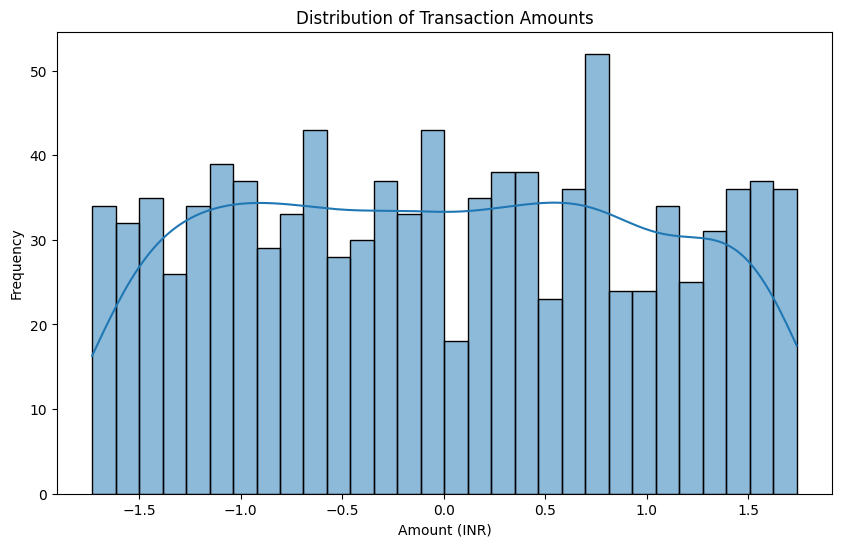

In [12]:
# Distribution of Amounts
plt.figure(figsize=(10, 6))
sns.histplot(transaction['Amount (INR)'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (INR)')
plt.ylabel('Frequency')
plt.show()

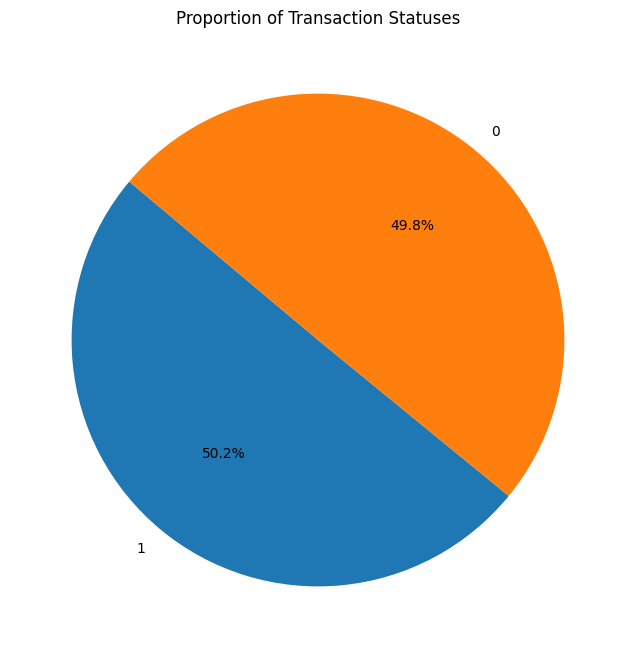

In [13]:
# Status Proportions
status_counts = transaction['Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Transaction Statuses')
plt.show()

# **3.  Model Training and Comparison**

In [14]:
# Define features and target variable
X = transaction.drop(columns=['Status'])
y = transaction['Status']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train

,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR)
541,243,623,83,214,0.681628
440,410,812,346,636,0.086241
482,722,533,17,3,0.360568
422,444,220,955,987,-1.318402
778,536,556,798,65,0.097369
...,...,...,...,...,...
106,692,153,751,707,0.697474
270,105,36,528,55,1.474344
860,708,520,673,536,0.990686
435,47,257,470,410,-1.052498


In [17]:
X_test

,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR)
521,183,271,134,860,0.618359
737,695,63,98,541,-0.119292
740,130,820,542,503,0.449730
660,877,668,744,45,0.426486
411,667,787,106,372,0.266871
...,...,...,...,...,...
468,74,334,970,858,0.570581
935,676,307,872,450,1.614850
428,541,162,301,482,0.132570
7,785,830,885,950,-0.111040


In [18]:
y_train

541    0
440    1
482    0
422    0
778    1
      ..
106    1
270    1
860    1
435    1
102    0
Name: Status, Length: 700, dtype: int64

In [19]:
y_test

521    1
737    0
740    1
660    1
411    0
      ..
468    0
935    0
428    0
7      0
155    0
Name: Status, Length: 300, dtype: int64

# **Logistic Regression**

In [20]:
# Normalisasi fitur
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_test, y_test)

# predict the response values for the observations in X
logreg.predict(x_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [23]:
# store the predicted response values
y_pred_logreg = logreg.predict(x_test)

# check how many predictions were generated
len(y_pred_logreg)

300

In [47]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logreg)
report = classification_report(y_test, y_pred_logreg)
conf_matrix = confusion_matrix(y_test, y_pred_logreg)

print(f'Logistic Regression Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Logistic Regression Accuracy: 0.5366666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       153
           1       0.53      0.50      0.51       147

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.54      0.54      0.54       300

Confusion Matrix:
[[88 65]
 [74 73]]


# **KNN**

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_knn))

0.5


In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)

print(f'KNN Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

KNN Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       153
           1       0.49      0.51      0.50       147

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

Confusion Matrix:
[[75 78]
 [72 75]]


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_knn)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 0.5
Mean Squared Error (MSE): 0.5
Root Mean Squared Error (RMSE): 0.7071067811865476
R-squared (R²): -1.000800320128051


# **SVM**

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

In [31]:
# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

In [32]:
y_pred_svm

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [45]:
# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

SVM Accuracy: 0.49666666666666665
Confusion Matrix:
[[74 79]
 [72 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.48      0.49       153
           1       0.49      0.51      0.50       147

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300



In [34]:
# Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, y_pred_svm)
mse = mean_squared_error(y_test, y_pred_svm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svm)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 0.5033333333333333
Mean Squared Error (MSE): 0.5033333333333333
Root Mean Squared Error (RMSE): 0.7094598884597587
R-squared (R²): -1.014138988928905


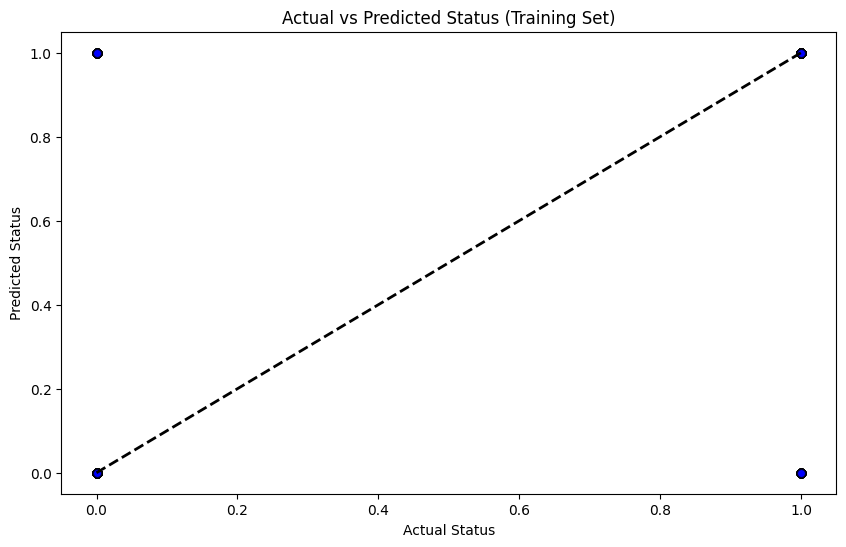

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Convert y_train to a NumPy array
y_train_array = np.array(y_train)

# Predict on the training data
y_train_pred = svm_model.predict(X_train_scaled)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_train_array, y_train_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_train_array.min(), y_train_array.max()], [y_train_array.min(), y_train_array.max()], 'k--', lw=2)
plt.xlabel("Actual Status")
plt.ylabel("Predicted Status")
plt.title("Actual vs Predicted Status (Training Set)")
plt.show()

**Review of parameter tuning using cross_val_score**

In [36]:
from sklearn.model_selection import cross_val_score

**Logistic Regression**

In [37]:
# Logistic Regression
logreg_scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print("Logistic Regression CV Accuracy:", logreg_scores.mean())

Logistic Regression CV Accuracy: 0.5189999999999999


**KNN**

In [39]:
# Instantiate model
knn = KNeighborsClassifier(n_neighbors=5)

# Cross_val_score takes care of splitting X and y into the 10 folds that's why we pass X and y entirely instead of X_train and y_train
knn_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(knn_scores)

[0.45 0.51 0.55 0.55 0.5  0.55 0.56 0.5  0.53 0.48]


In [40]:
# Scores is a numpy array so we can use the mean method
print(knn_scores.mean())

0.518


**SVM**

In [52]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(svm_accuracy)

0.49666666666666665


**Plot Compare Model**

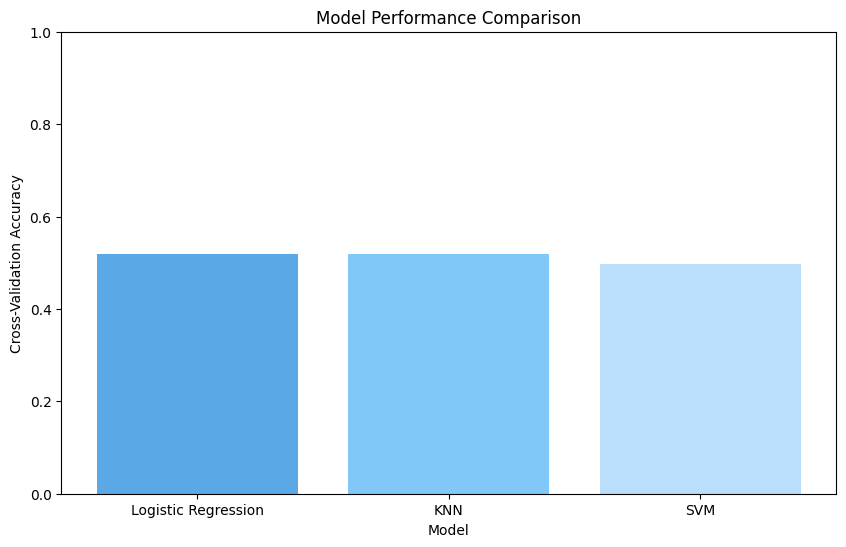

In [51]:
# Visualzation
import matplotlib.pyplot as plt

# Cross-validation scores
models = ['Logistic Regression', 'KNN', 'SVM']
scores = [logreg_scores.mean(), knn_scores.mean() ,svm_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['#5aa9e6', '#7fc8f8', '#bbdefb'])
plt.xlabel('Model')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()

# **4. Model Selection and Deployment**

Berdasarkan metrik performa,model yang akan dipilih adalah Logistic Regression Model. Alasan memilih model ini karena berdasarkan hasil evaluasi model biasa (0.5366666666666666) dan menggunakan crossvalidation score (0.5189999999999999) serta melihat F1 scorenya model Regresi Logistik lebih tinggi dibandingkan model KNN dan SVM. Selain itu model Regresi Logistik termasuk model yang sederhana dan lebih dapat dengan mudah diinterpretasikan.